# Average time spent by a user on social media

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
df = pd.read_csv('dummy_data.csv')

In [3]:
df.head()

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True


In [4]:
df.shape

(1000, 12)

In [5]:
df.time_spent.unique()

array([3, 2, 8, 5, 1, 4, 7, 6, 9], dtype=int64)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           1000 non-null   int64 
 1   gender        1000 non-null   object
 2   time_spent    1000 non-null   int64 
 3   platform      1000 non-null   object
 4   interests     1000 non-null   object
 5   location      1000 non-null   object
 6   demographics  1000 non-null   object
 7   profession    1000 non-null   object
 8   income        1000 non-null   int64 
 9   indebt        1000 non-null   bool  
 10  isHomeOwner   1000 non-null   bool  
 11  Owns_Car      1000 non-null   bool  
dtypes: bool(3), int64(3), object(6)
memory usage: 73.4+ KB


In [7]:
df.describe()

,age,time_spent,income
count,1000.000000,1000.000000,1000.000000
mean,40.986000,5.029000,15014.823000
std,13.497852,2.537834,2958.628221
min,18.000000,1.000000,10012.000000
25%,29.000000,3.000000,12402.250000
50%,42.000000,5.000000,14904.500000
75%,52.000000,7.000000,17674.250000
max,64.000000,9.000000,19980.000000


In [8]:
df.gender.unique()

array(['male', 'female', 'non-binary'], dtype=object)

In [9]:
#Encoding gender column 
df.gender = df.gender.replace({'female':0, 'male':1, 'non-binary':2}).astype(int)

In [10]:
df.gender.unique()

array([1, 0, 2])

In [11]:
df.columns

Index(['age', 'gender', 'time_spent', 'platform', 'interests', 'location',
       'demographics', 'profession', 'income', 'indebt', 'isHomeOwner',
       'Owns_Car'],
      dtype='object')

In [12]:
df.platform.unique()

array(['Instagram', 'Facebook', 'YouTube'], dtype=object)

# Encoding Categorical features

In [13]:
#Encoding platform column 
df.platform = df.platform.replace({'Instagram':0, 'Facebook':1, 'YouTube':2}).astype(int)

In [14]:
df.interests.unique()

array(['Sports', 'Travel', 'Lifestlye'], dtype=object)

In [15]:
#Encoding interests column 
df.interests = df.interests.replace({'Sports':0, 'Travel':1, 'Lifestlye':2}).astype(int)

In [16]:
df.location.unique()

array(['United Kingdom', 'Australia', 'United States'], dtype=object)

In [17]:
#Encoding interests column 
df.location = df.location.replace({'United Kingdom':0, 'Australia':1, 'United States':2}).astype(int)

In [18]:
df.demographics.unique()

array(['Urban', 'Sub_Urban', 'Rural'], dtype=object)

In [19]:
#Encoding interests column 
df.demographics = df.demographics.replace({'Urban':0, 'Sub_Urban':1, 'Rural':2}).astype(int)

In [20]:
df.profession.unique()

array(['Software Engineer', 'Student', 'Marketer Manager'], dtype=object)

In [21]:
#Encoding interests column 
df.profession = df.profession.replace({'Software Engineer':0, 'Student':1, 'Marketer Manager':2}).astype(int)

In [22]:
df.indebt.unique()

array([ True, False])

In [23]:
#Encoding indebt column 
df.indebt = df.indebt.replace({'False':0, 'True':1}).astype(int)

In [24]:
df.isHomeOwner.unique()

array([False,  True])

In [25]:
#Encoding isHomeOwner column 
df.isHomeOwner = df.isHomeOwner.replace({'False':0, 'True':1}).astype(int)

In [26]:
df.Owns_Car.unique()

array([False,  True])

In [27]:
#Encoding Owns_Car column 
df.Owns_Car = df.Owns_Car.replace({'False':0, 'True':1}).astype(int)

# Feature scaling

In [28]:
scaler = MinMaxScaler()

In [29]:
df['income'] = scaler.fit_transform(df[['income']])

In [30]:
df.head()

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,56,1,3,0,0,0,0,0,0.979334,1,0,0
1,46,0,2,1,1,0,0,1,0.055377,1,1,1
2,32,1,8,0,0,1,1,2,0.325642,0,0,0
3,60,2,5,0,1,0,0,1,0.249599,0,1,0
4,25,1,1,0,2,1,0,0,0.456862,0,1,1


# Correlation analysis

In [31]:
correlation = df.corr()

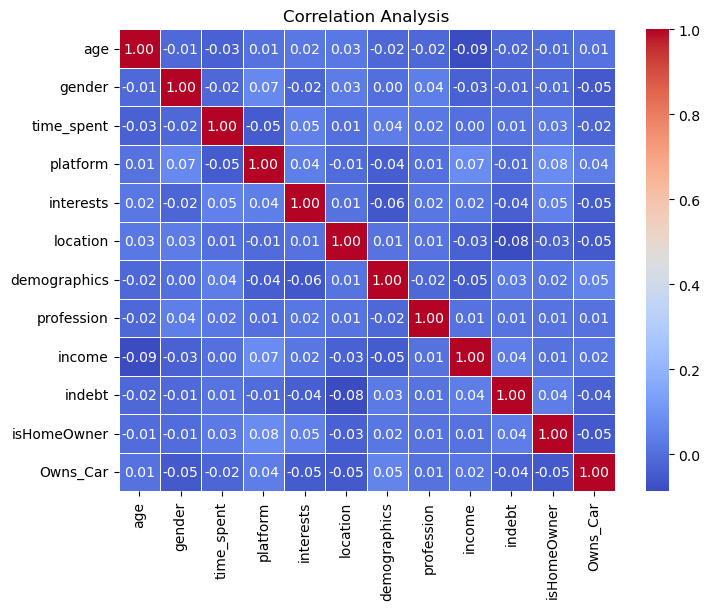

In [32]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Analysis')
plt.show()

# Splitting Training and testing data

In [48]:
X = df.drop('time_spent',axis=1)
y = df['time_spent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1 )

In [49]:
X_train.shape

(800, 11)

In [50]:
X_test.shape

(200, 11)

In [51]:
df.time_spent.unique()

array([3, 2, 8, 5, 1, 4, 7, 6, 9], dtype=int64)

# Training

In [52]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

# Testing my trained model

In [53]:
train_pred = rf_model.predict(X_train)

In [54]:
print("Accuracy:", accuracy_score(y_train, train_pred))

Accuracy: 1.0


In [56]:
test_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, test_pred))

Accuracy: 0.135


In [45]:
y_test

69     1
873    7
561    9
444    5
793    9
      ..
785    9
524    3
416    9
484    9
849    3
Name: time_spent, Length: 200, dtype: int64

In [46]:
y_test.value_counts()

5    25
4    24
7    22
9    22
2    22
6    22
8    22
3    21
1    20
Name: time_spent, dtype: int64

<AxesSubplot:>

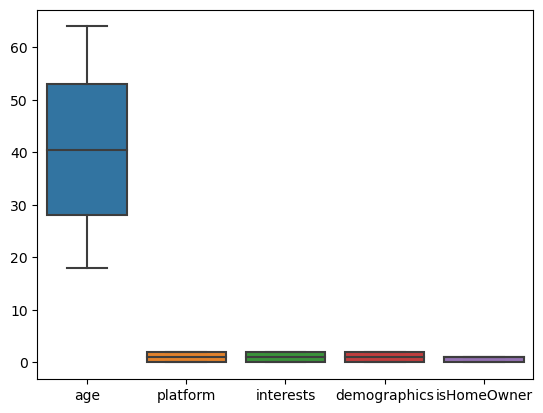

In [47]:
sns.boxplot(data=X_test)

In [44]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
y_pred = logreg_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.14


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# SVM
from sklearn.svm import SVC